# Análisis de Algoritmos ICI522

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

In [1]:
from platform import python_version

print(python_version())

import time

help(time.clock)

3.6.9
Help on built-in function clock in module time:

clock(...)
    clock() -> floating point number
    
    Return the CPU time or real time since the start of the process or since
    the first call to clock().  This has as much precision as the system
    records.



# Costo Constante

El costo constante se refiere al caso cuando el algoritmo tiene costo invariante al tamaño del problema $\mathcal{O}(1)$

In [77]:
import time
from time import clock

square_exp = lambda n : n**2
square = lambda n : n*n

experiments={1,100,300,500,1000,3000,5000,7000,10000}
samples=1000
results_1={}
results_2={}
for n in experiments:
    result1=[]
    result2=[]
    for sample in range(samples):
        t = clock()
        v1=square_exp(n)
        t1 = clock() - t
        t = clock()
        v2=square(n)
        t2 = clock() - t
        result1.append(t1)
        result2.append(t2)
    results_1.update({n:result1})
    results_2.update({n:result2})

In [78]:
import pandas as pd

df_sq_exp=pd.DataFrame(results_1)
df_sq=pd.DataFrame(results_2)

In [79]:
df_sq_exp=df_sq_exp.stack().reset_index()
df_sq=df_sq.stack().reset_index()

In [80]:
df_sq_exp['method']='n**2'
df_sq['method']='n*n'

In [81]:
df=pd.concat([df_sq,df_sq_exp])

In [82]:
df['method']=df['method'].astype('category')

In [83]:
df.drop(columns=['level_0'],inplace=True)

In [84]:
df.rename(columns={'level_1':'size',0:'time'},inplace=True)

In [85]:
df['size']=df['size'].astype('category')

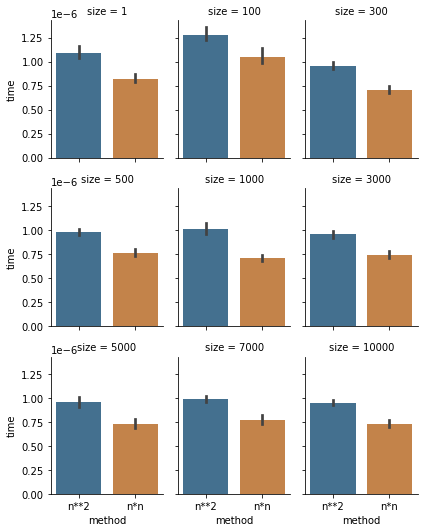

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x="method", y="time", col="size",data=df, saturation=.5,
                kind="bar", col_wrap=3, height=2.5, aspect=.8)

In [87]:
from scipy import stats

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.

for n in experiments:
    pvalue=stats.ttest_ind(df.loc[(df['method'] == 'n*n') & (df['size'] ==n)]['time'],
                           df.loc[(df['method'] == 'n**2') & (df['size'] ==n)]['time'])[1]
    print('n={0}, valor-p : {1:06.8f}'.format(n,pvalue))
    if pvalue > 0.05:
        print('Datos provienen de la misma distribucion')
    else:
        print('Datos provienen de distribuciones diferentes')
    print('----------------------------------------')

n=1, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=100, valor-p : 0.00005486
Datos provienen de distribuciones diferentes
----------------------------------------
n=1000, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=5000, valor-p : 0.00000001
Datos provienen de distribuciones diferentes
----------------------------------------
n=300, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=10000, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=7000, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=500, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=3000, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
-----------

In [15]:
from scipy.stats import ttest_ind
import numpy as np

# problema con tama~{n}os de muestra peque~{n}os!

samples=5
data1 = np.random.normal(1,1,samples)
data2 = np.random.normal(0,1,samples)
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Datos provienen de la misma distribucion')
else:
    print('Datos provienen de distribuciones diferentes')

stat=0.939, p=0.375
Datos provienen de la misma distribucion


# Costo Lineal

El costo lineal se refiere al caso cuando el algoritmo tiene costo lineal con respecto al tamaño del problema $\mathcal{O}(n)$

In [1]:
def cumsum(n):
    j=0
    for i in range(int(n)):
        j=j+i
    return j

print('La suma acumulativa de 10 es : %5d'%cumsum(10))
print('La suma acumulativa de 1000 es : %5d'%cumsum(1e3))

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


In [14]:
import numpy as np

print('La suma acumulativa de 10 es : %5d'%np.cumsum(np.arange(10))[-1])
print('La suma acumulativa de 1000 es : %5d'%np.cumsum(np.arange(1e3))[-1])

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


# Tarea

En este laboratorio Ud debe completar las siguientes tareas:

    1.) Comparar dos implementaciones distintas para una funcion de costo lineal.
    2.) Reportar los tiempos de ejecucion para distintos tamaños de problema.
    3.) Evaluar los valores-p para cada tamaño de problema e implementación.